### Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sci

from scipy.cluster.hierarchy import dendrogram, linkage

### Ex 1) (Rencher 14.8)

Use the hematology data of Table 4.3.

1) Carry out a cluster analysis using the centroid method and find the distance between the centroids of the two-cluster solution.
2) Carry out a cluster analysis using the average linkage method. How many clusters are indicated in the dendrogram?
3) Using the two-cluster solution from part 2, label observations from one cluster as group 1 and the observations from the other cluster as group 2. Calculate and plot the discriminant function. Do the two clusters overlap?

In [2]:
names = [f"y{i+1}" for i in range(6)]
df = pd.read_table("Data/T4_3_HEMATOL.DAT", header=None, sep="\s+", names=names)
df.head(10)

,y1,y2,y3,y4,y5,y6
0,13.4,39,4100,14,25,17
1,14.6,46,5000,15,30,20
2,13.5,42,4500,19,21,18
3,15.0,46,4600,23,16,18
4,14.6,44,5100,17,31,19
5,14.0,44,4900,20,24,19
6,16.4,49,4300,21,17,18
7,14.8,44,4400,16,26,29
8,15.2,46,4100,27,13,27
9,15.5,48,8400,34,42,36


#### 1)

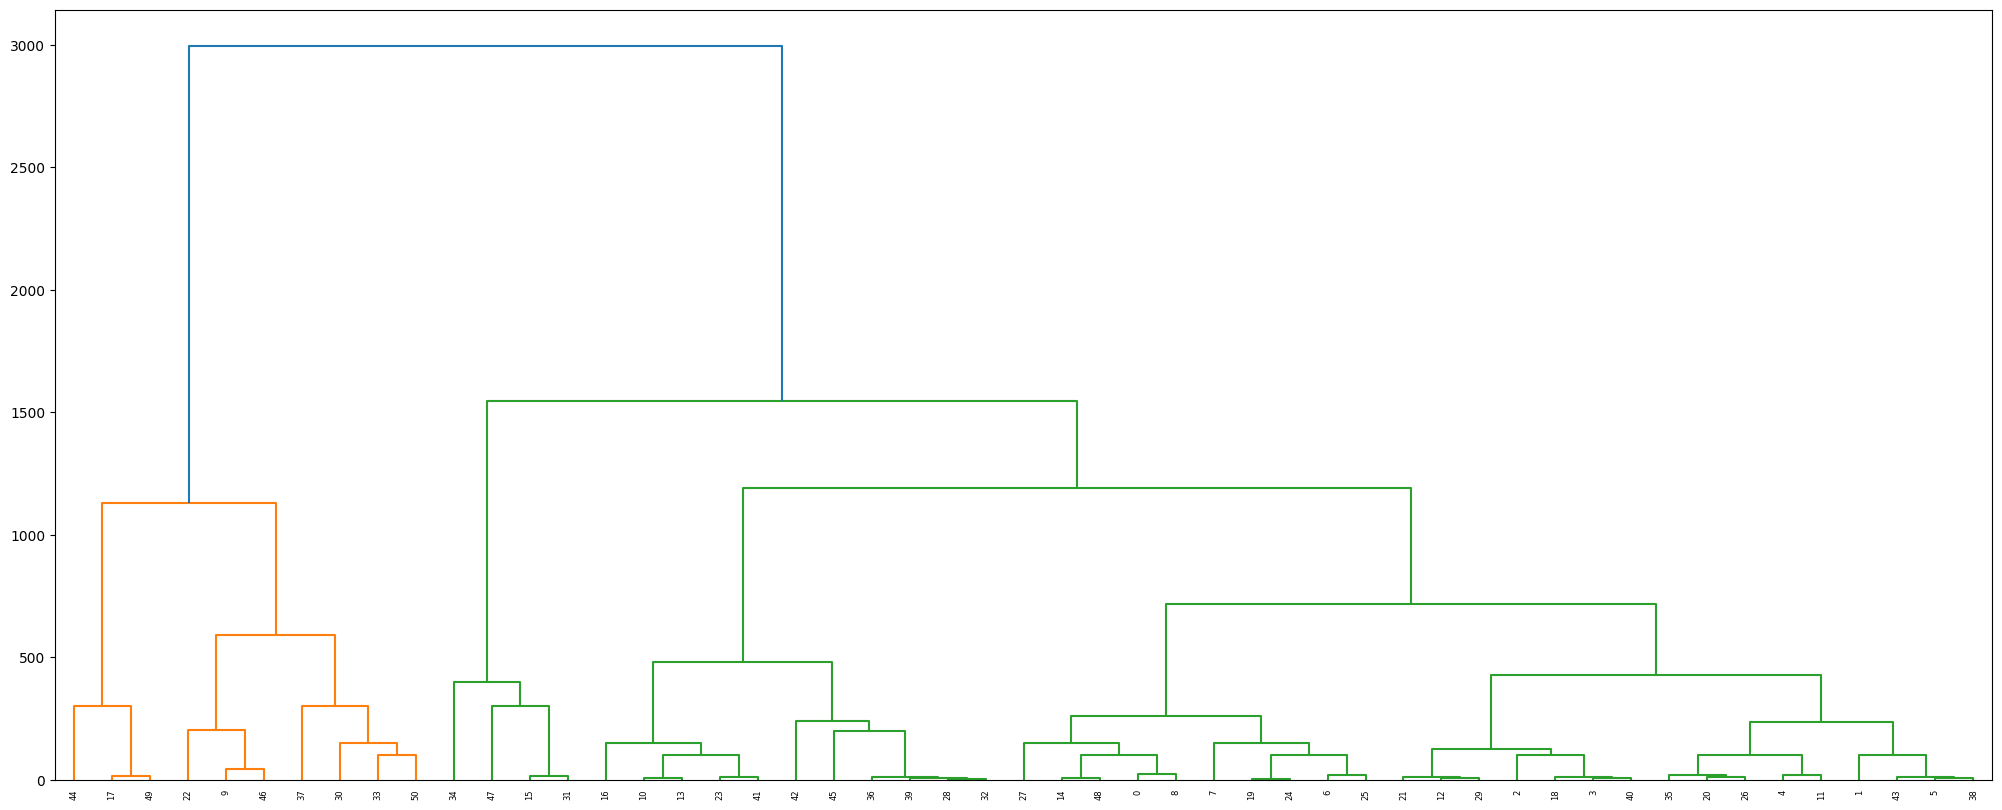

In [3]:
Z = linkage(df.to_numpy(), method='centroid')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

$Z$ is a $(n-1) \times 4$ matrix. At the $i$-th iteration, clusters with indices $Z[i, 0]$ and $Z[i, 1]$ are combined to form cluster $n+i$. A cluster with an index less than $n$ corresponds to one of the original observations. The distance between clusters $Z[i, 0]$ and $Z[i, 1]$ is given by $Z[i, 2]$. The fourth value $Z[i, 3]$ represents the number of original observations in the newly formed cluster.

In [4]:
# print(Z[:,[0,1,3]])
Z[-5:]

array([[  88.        ,   93.        ,  718.76204119,   26.        ],
       [  91.        ,   95.        , 1128.61995652,   10.        ],
       [  94.        ,   96.        , 1189.53862391,   37.        ],
       [  92.        ,   98.        , 1545.97866619,   41.        ],
       [  97.        ,   99.        , 2994.93876774,   51.        ]])

For 2-claster solution we have the distance between the centroids of the two-cluster solution:

In [5]:
Z[-1, 2]**0.5

54.72603372929356

#### 2)

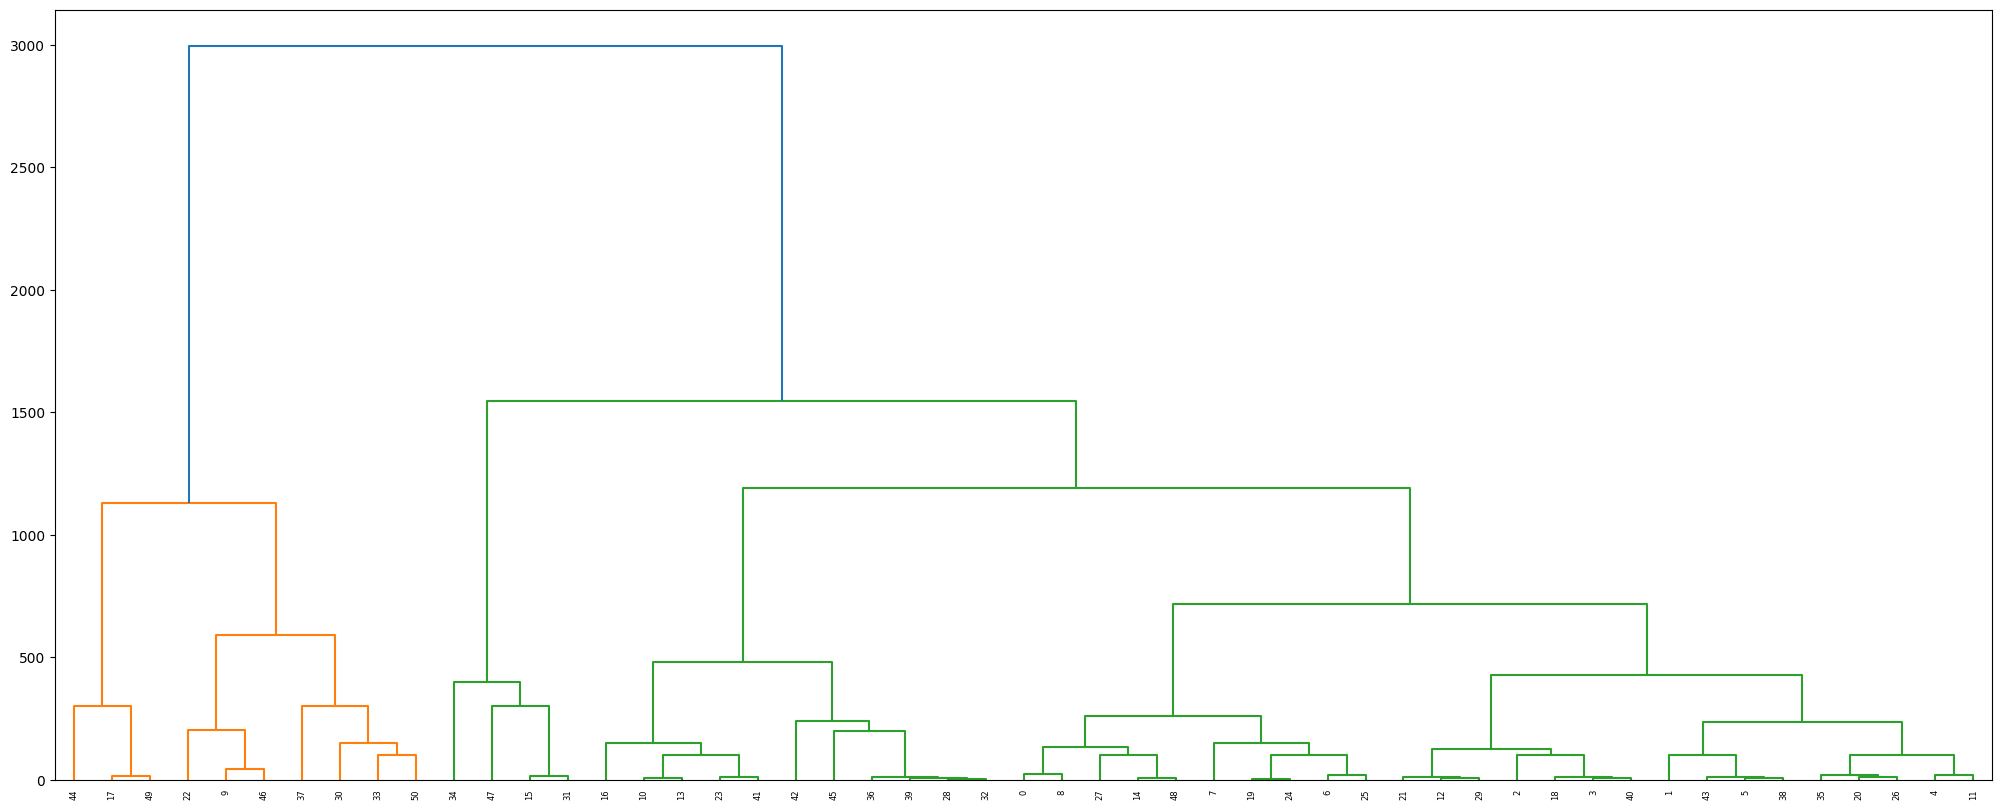

In [6]:
Z = linkage(df.to_numpy(), method='average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

The largest change in distance corresponds to a two-cluster solution:

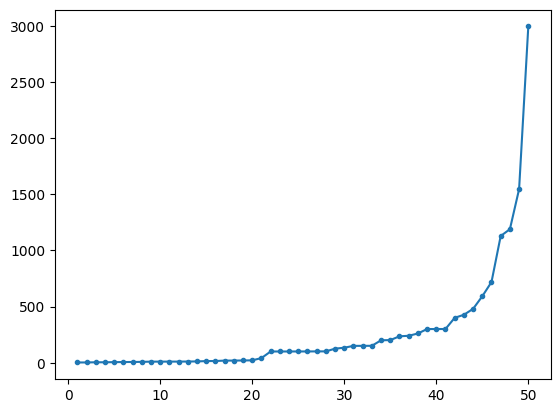

In [7]:
fig, ax = plt.subplots()

ax.plot(np.arange(1, Z.shape[0]+1, 1), Z[:,2], marker=".")

plt.show()

#### 3)

In [8]:
group_1 = [44, 17, 49, 22, 9, 46, 37, 30, 33, 50]

In [9]:
clasterization_results = 2 * np.ones(df.shape[0])
clasterization_results[group_1] -= 1

In [10]:
df["group"] = clasterization_results.astype(int)

In [11]:
df

,y1,y2,y3,y4,y5,y6,group
0,13.4,39,4100,14,25,17,2
1,14.6,46,5000,15,30,20,2
2,13.5,42,4500,19,21,18,2
3,15.0,46,4600,23,16,18,2
4,14.6,44,5100,17,31,19,2
5,14.0,44,4900,20,24,19,2
6,16.4,49,4300,21,17,18,2
7,14.8,44,4400,16,26,29,2
8,15.2,46,4100,27,13,27,2
9,15.5,48,8400,34,42,36,1


In [12]:
df_1 = df[df["group"] == 1].drop(columns="group")
df_2 = df[df["group"] == 2].drop(columns="group")

In [13]:
n_1, n_2 = df_1.shape[0], df_2.shape[0]

In [14]:
mu_1, mu_2 = df_1.mean(), df_2.mean()
S_1, S_2 = df_1.cov(), df_2.cov()

In [15]:
S_pl = (S_1 * (n_1 - 1) + S_2 * (n_2 - 1)) / (n_1 + n_2 - 2)

In [16]:
a = np.linalg.inv(S_pl) @ (mu_1 - mu_2)
a

array([ 0.26318849, -0.225361  ,  0.00846295, -0.21435478, -0.43393177,
        0.22303171])

In [17]:
def desc(y):
    return a.T @ y

In [18]:
values_1 = df_1[["y1", "y2", "y3", "y4", "y5", "y6"]].apply(desc, axis=1)
values_2 = df_2[["y1", "y2", "y3", "y4", "y5", "y6"]].apply(desc, axis=1)

In [19]:
(values_1.min() > values_2.max()) or (values_1.max() < values_2.min())

True

Therefore clasters do not overlap.

### Ex 2) (Rencher 14.9)

Use all the variables of the Seishu data of Table 7.1.

1. Find the three-cluster solution using the single linkage, complete linkage, average linkage, centroid, median, and Ward’s methods. Which observation appears to be an outlier? Which cluster is the same in all six solutions?
2. Using the cluster found in part (a) to be common to all solutions as group 1 and the rest of the observations as group 2, calculate and plot the discriminant function. Do the two clusters overlap?

In [20]:
names = [f"y{i+1}" for i in range(10)]
df = pd.read_table("Data/T7_1_SEISHU.DAT", header=None, sep="\s+", names=names)
df.head(10)

,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10
0,1.0,0.8,4.05,1.68,0.85,3.0,3.97,5.00,16.90,122.0
1,0.1,0.2,3.81,1.39,0.30,0.6,3.62,4.52,15.80,62.0
2,0.5,0.0,4.20,1.63,0.92,-2.3,3.48,4.46,15.80,139.0
3,0.7,0.7,4.35,1.43,0.97,-1.6,3.45,3.98,15.40,150.0
4,-0.1,-1.1,4.35,1.53,0.87,-2.0,3.67,4.22,15.40,138.0
5,0.4,0.5,4.05,1.84,0.95,-2.5,3.61,5.00,16.78,123.0
6,0.2,-0.3,4.20,1.61,1.09,-1.7,3.25,4.15,15.81,172.0
7,0.3,-0.1,4.32,1.43,0.93,-5.0,4.16,5.45,16.78,144.0
8,0.7,0.4,4.21,1.74,0.95,-1.5,3.40,4.25,16.62,153.0
9,0.5,-0.1,4.17,1.72,0.92,-1.2,3.62,4.31,16.70,121.0


In [21]:
methods = ["single", "complete", "average", "centroid", "median", "ward"]

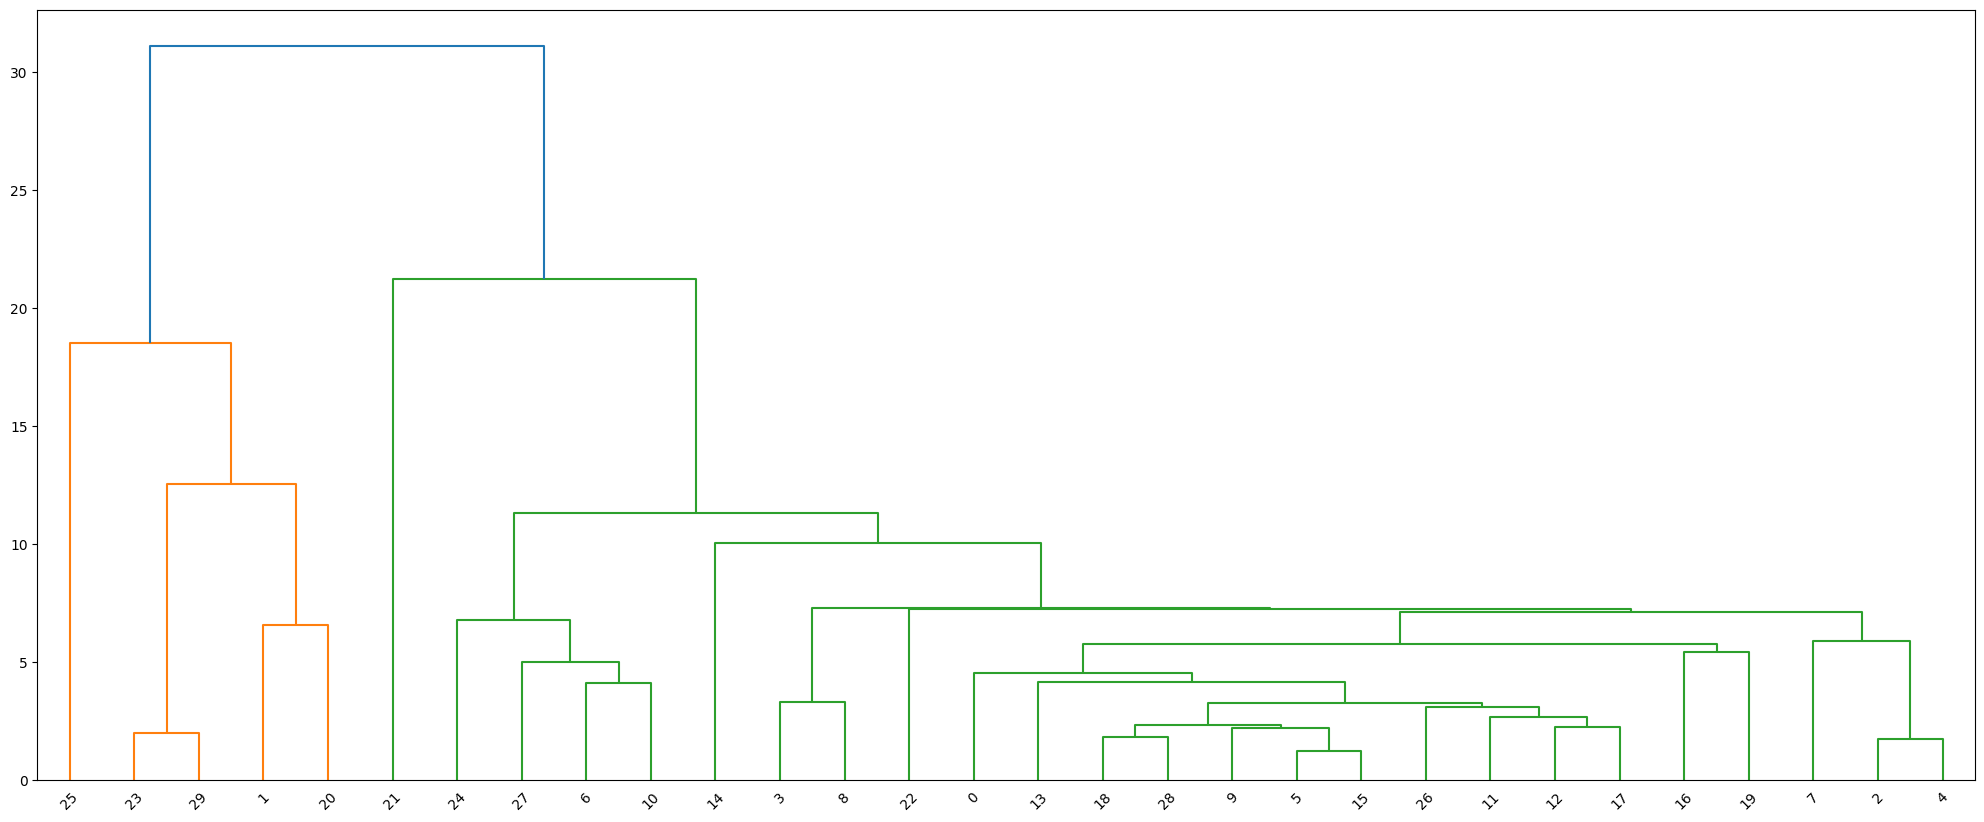

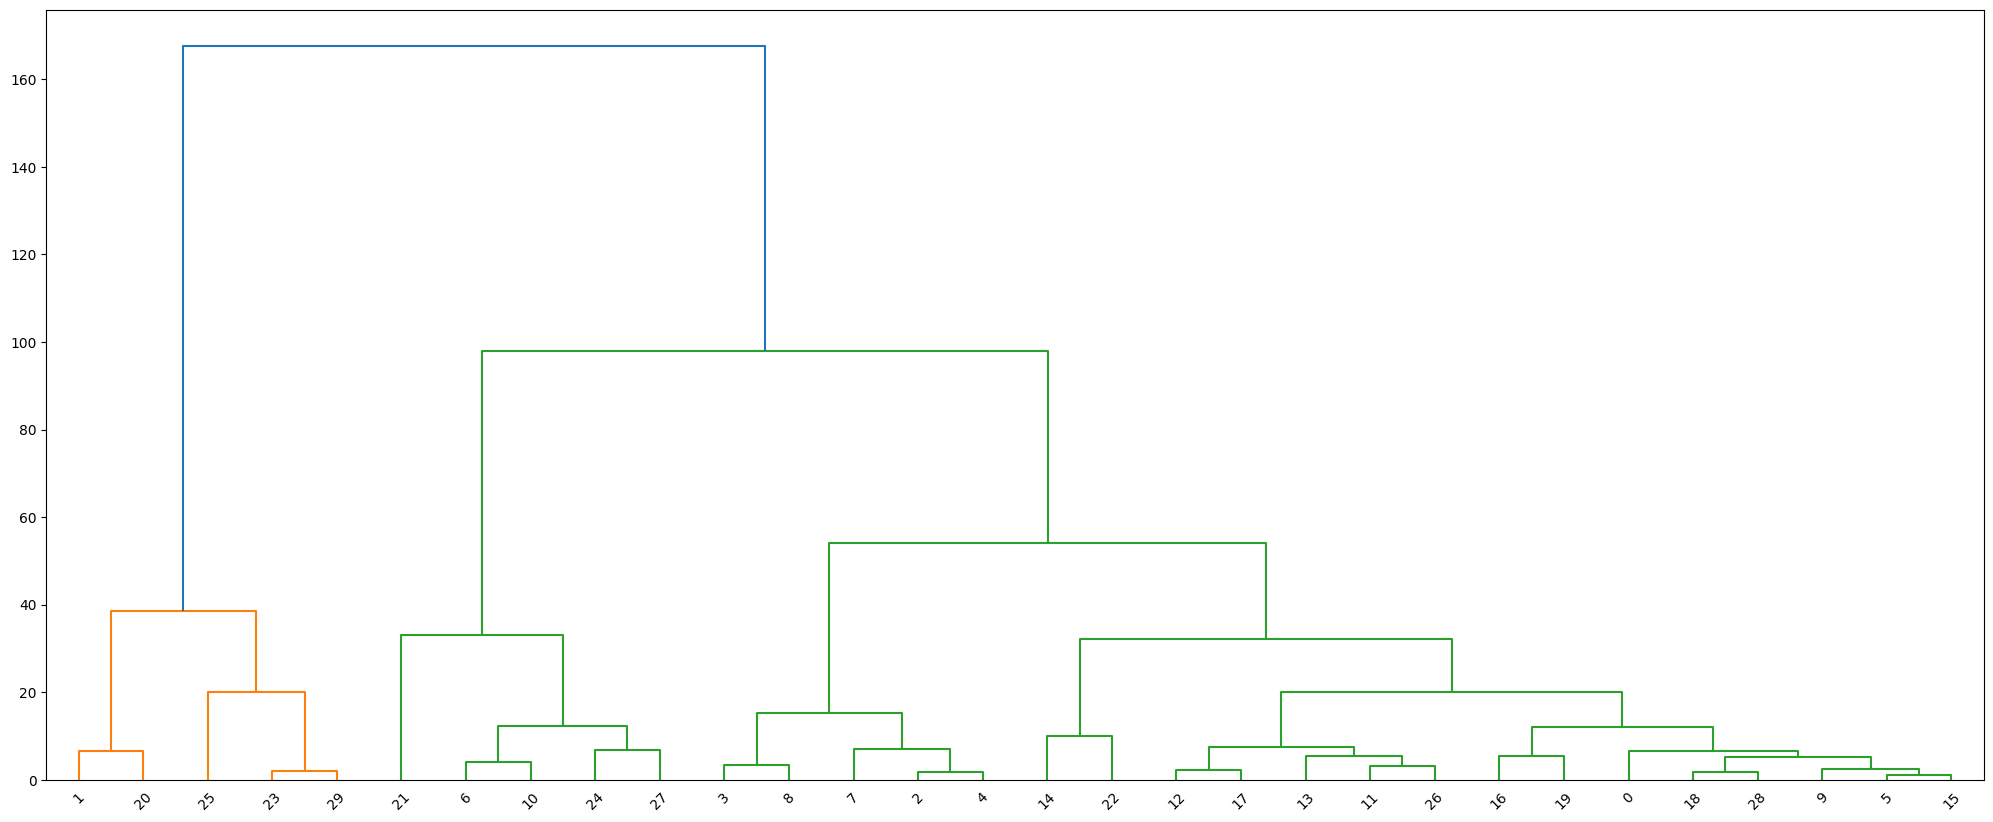

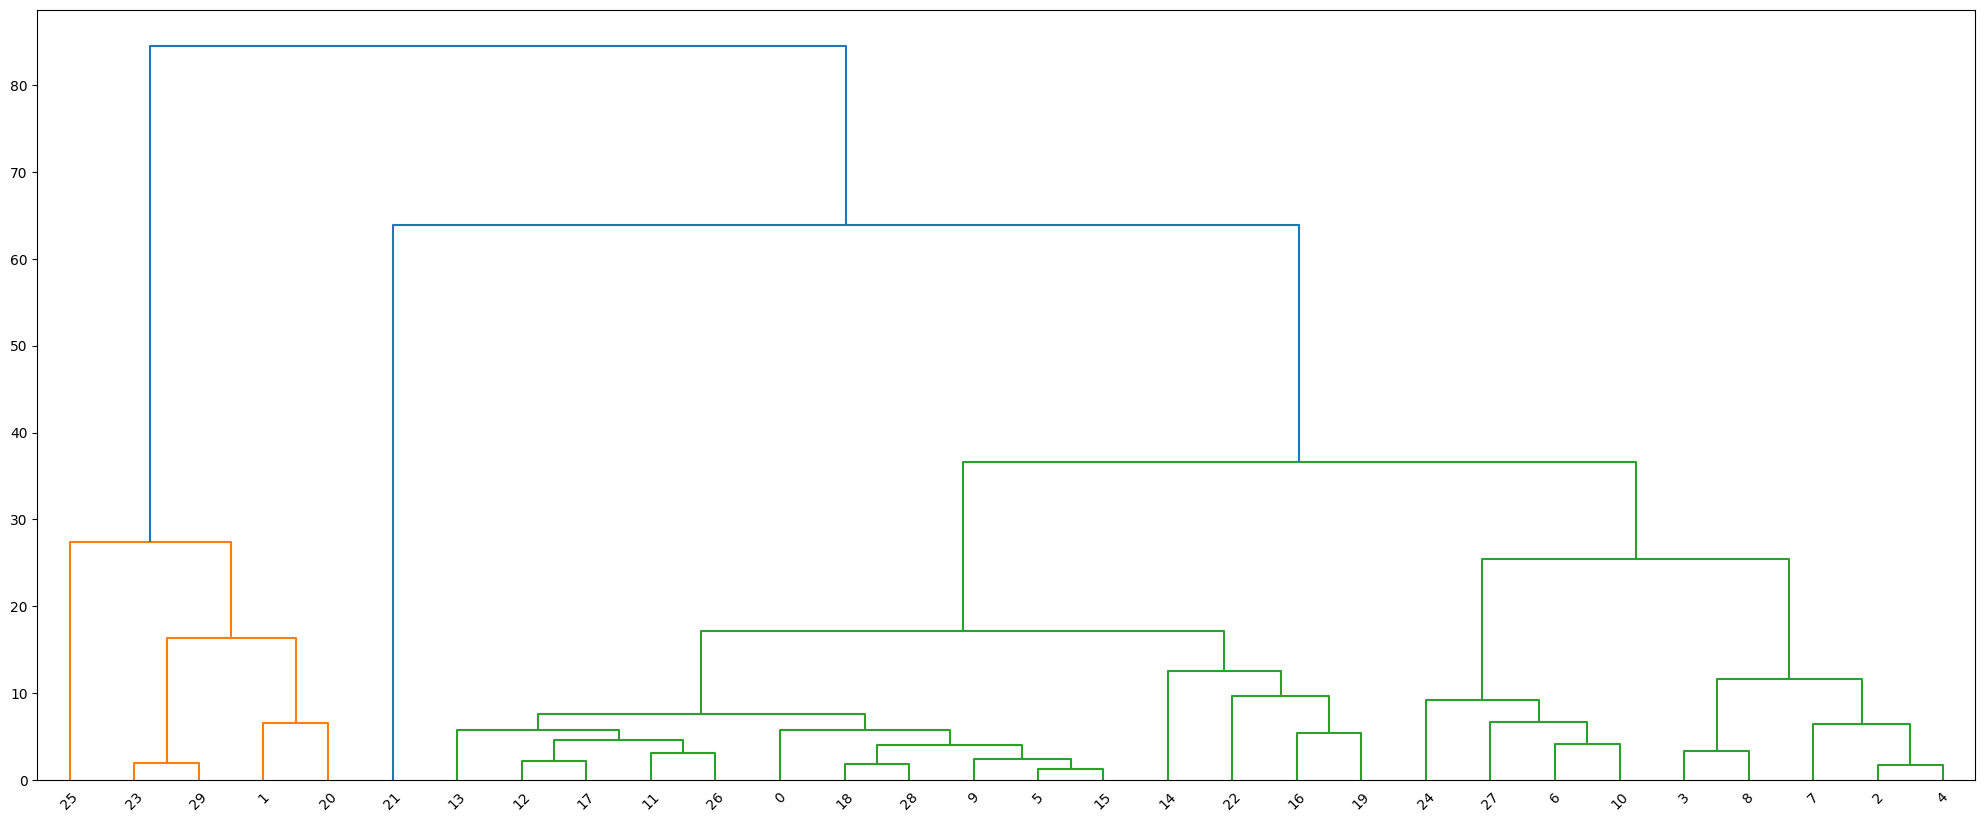

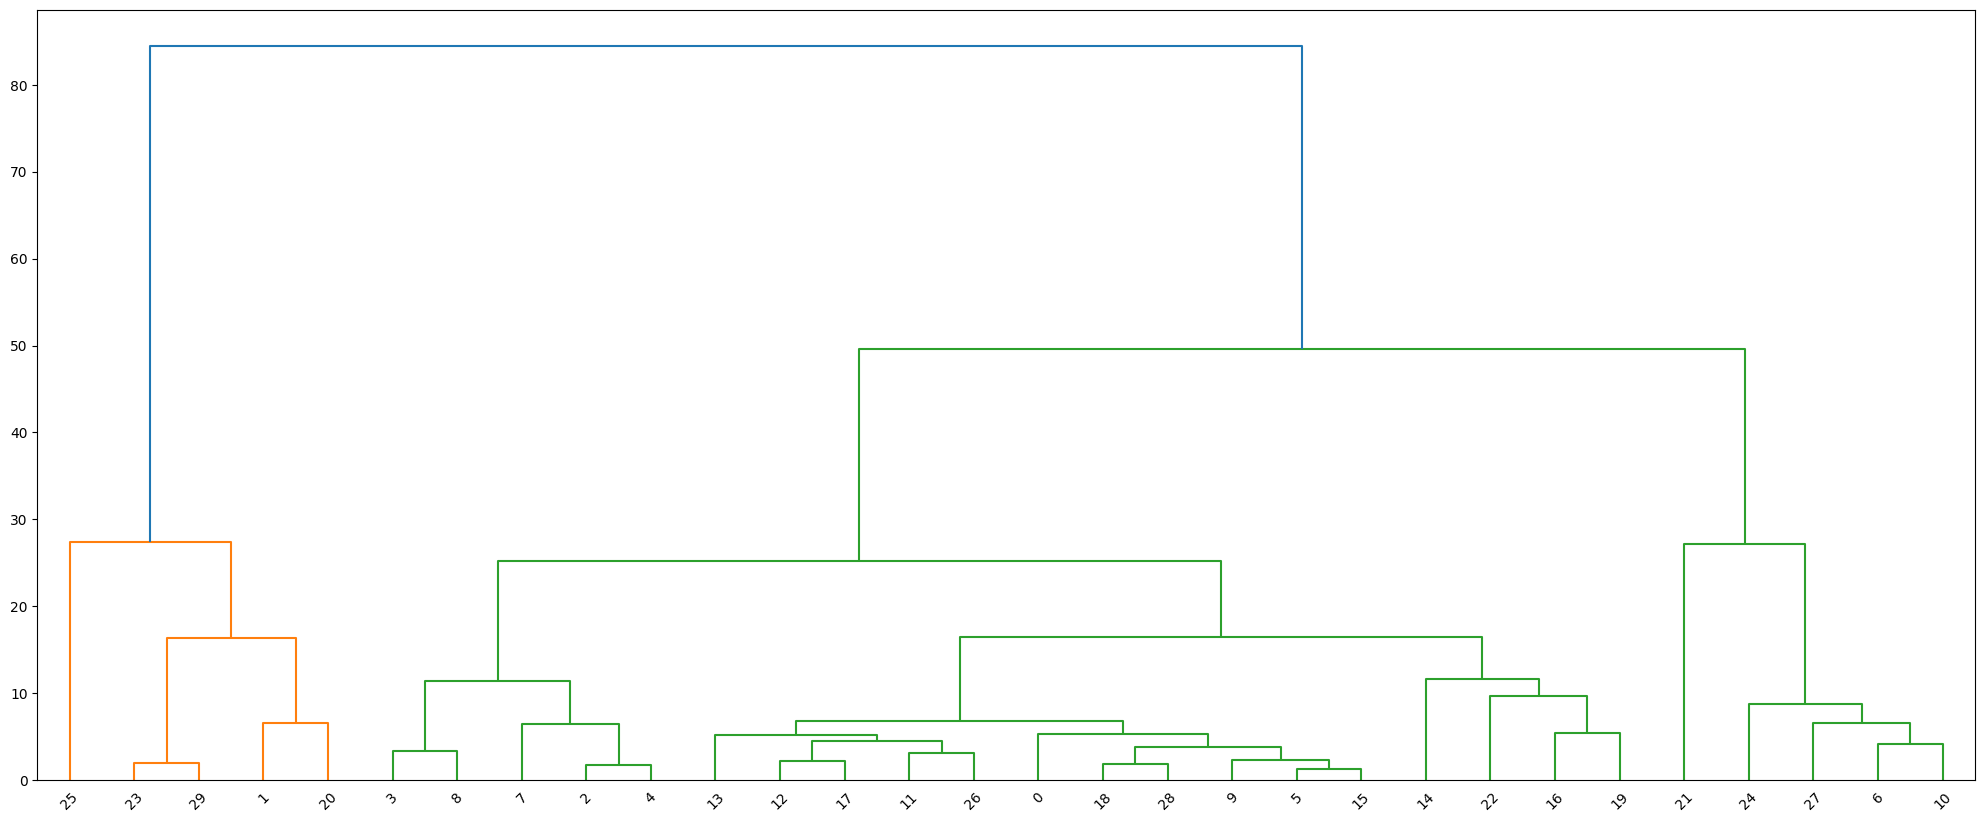

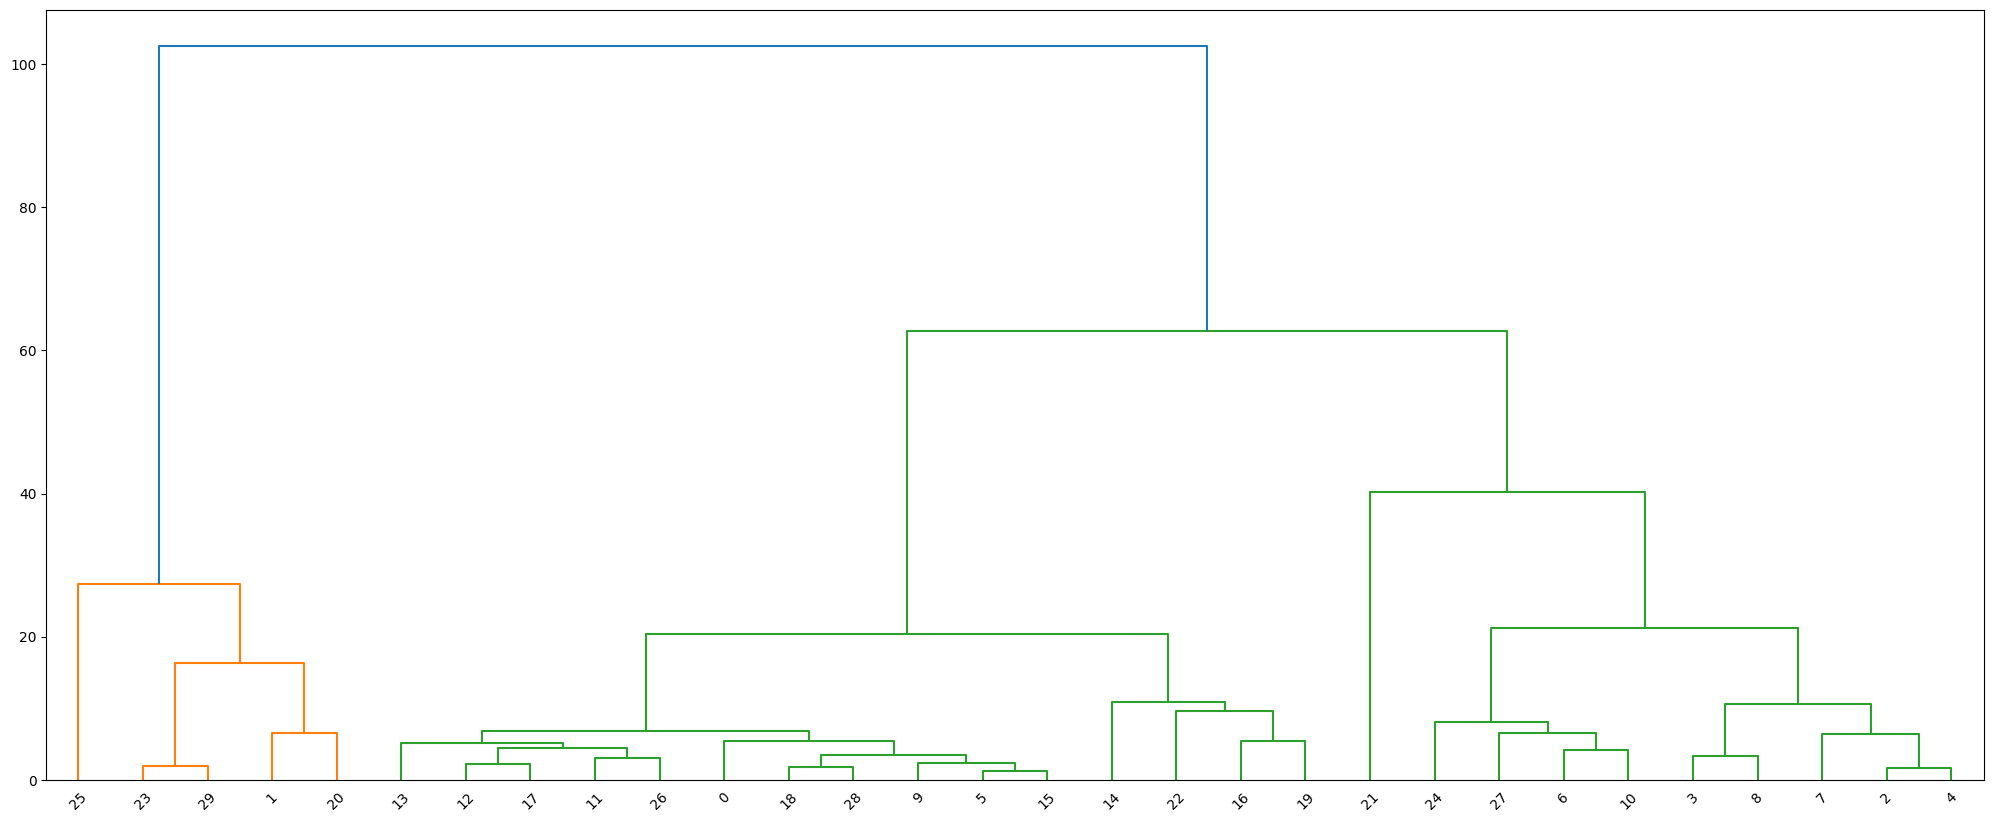

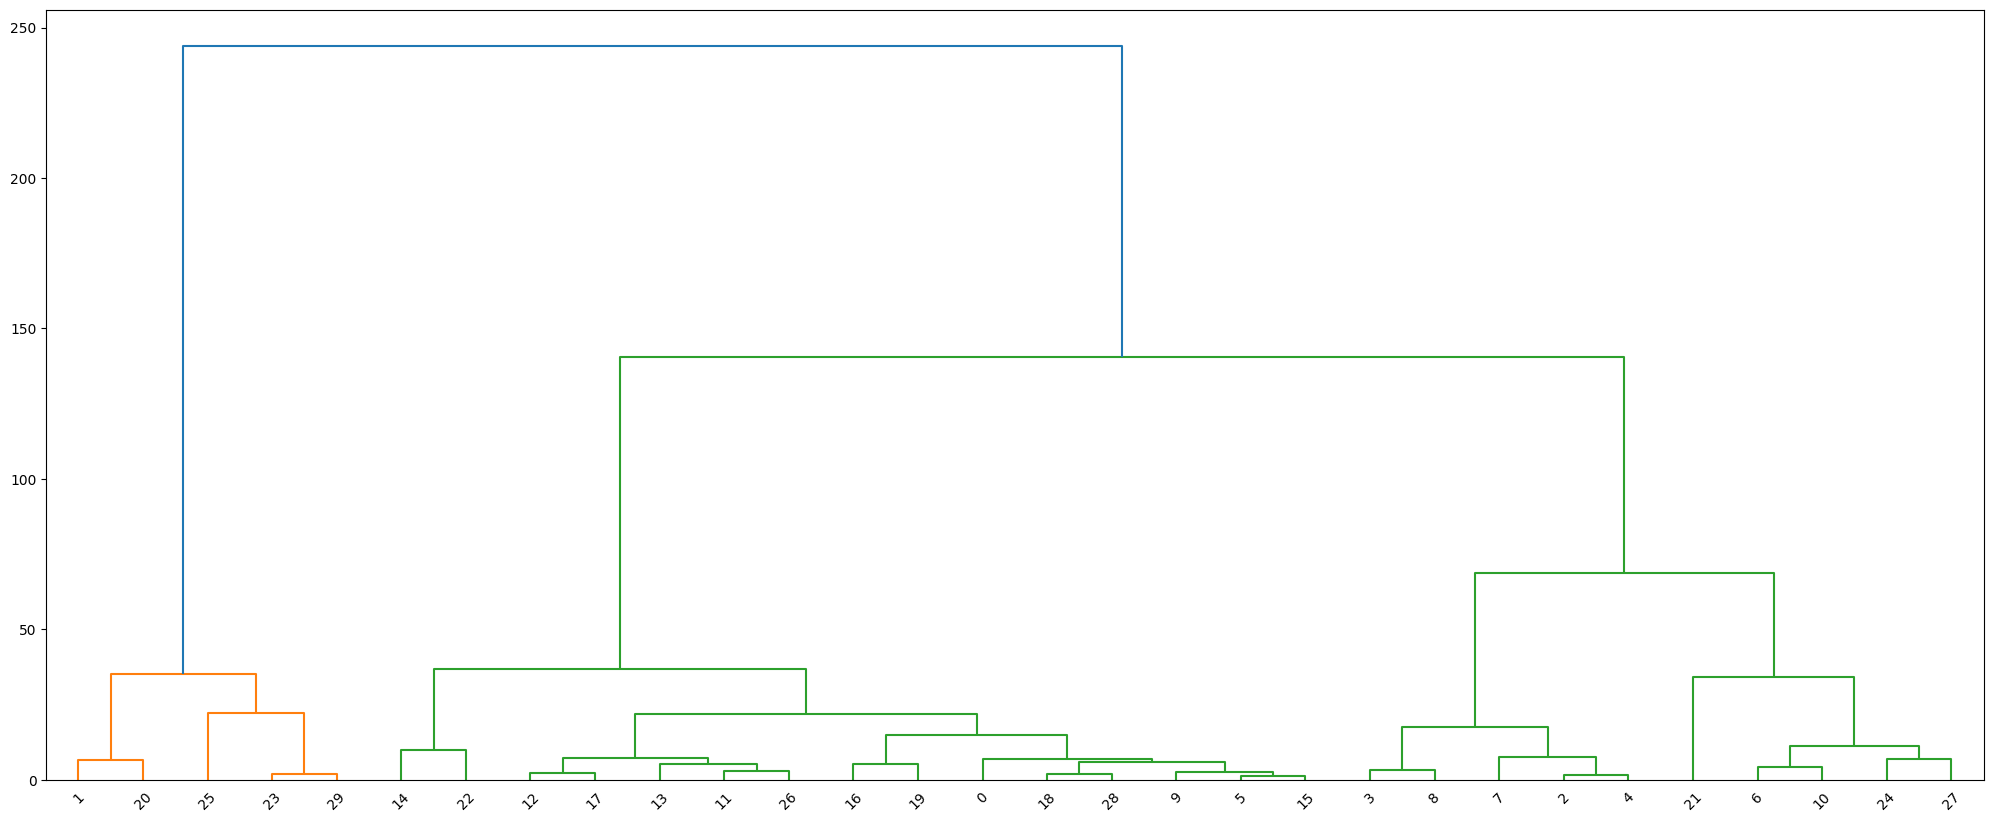

In [22]:
Z_l = []

for i in range(len(methods)):
    Z = linkage(df.to_numpy(), method=methods[i])
    Z_l.append(Z)
    fig = plt.figure(figsize=(25, 10))
    dn = dendrogram(Z)
    plt.show()

Claster $\{1, 20, 23, 25, 29\}$ is present in each solution.

Observation $21$ seems to be the outlier. Indeed, on the dendrogram it is high in each solution, and especially in single linkage and average linkage methods.

In [23]:
group_1 = [1, 20, 23, 25, 29]

In [24]:
clasterization_results = 2 * np.ones(df.shape[0])
clasterization_results[group_1] -= 1

In [25]:
df["group"] = clasterization_results.astype(int)

In [26]:
df

,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,group
0,1.0,0.8,4.05,1.68,0.85,3.0,3.97,5.00,16.90,122.0,2
1,0.1,0.2,3.81,1.39,0.30,0.6,3.62,4.52,15.80,62.0,1
2,0.5,0.0,4.20,1.63,0.92,-2.3,3.48,4.46,15.80,139.0,2
3,0.7,0.7,4.35,1.43,0.97,-1.6,3.45,3.98,15.40,150.0,2
4,-0.1,-1.1,4.35,1.53,0.87,-2.0,3.67,4.22,15.40,138.0,2
5,0.4,0.5,4.05,1.84,0.95,-2.5,3.61,5.00,16.78,123.0,2
6,0.2,-0.3,4.20,1.61,1.09,-1.7,3.25,4.15,15.81,172.0,2
7,0.3,-0.1,4.32,1.43,0.93,-5.0,4.16,5.45,16.78,144.0,2
8,0.7,0.4,4.21,1.74,0.95,-1.5,3.40,4.25,16.62,153.0,2
9,0.5,-0.1,4.17,1.72,0.92,-1.2,3.62,4.31,16.70,121.0,2


In [27]:
df_1 = df[df["group"] == 1].drop(columns="group")
df_2 = df[df["group"] == 2].drop(columns="group")

In [28]:
n_1, n_2 = df_1.shape[0], df_2.shape[0]

In [29]:
mu_1, mu_2 = df_1.mean(), df_2.mean()
S_1, S_2 = df_1.cov(), df_2.cov()

In [30]:
S_pl = (S_1 * (n_1 - 1) + S_2 * (n_2 - 1)) / (n_1 + n_2 - 2)

In [31]:
a = np.linalg.inv(S_pl) @ (mu_1 - mu_2)
a

array([  0.31939067,   1.49727446,  -8.89708728, -27.14469528,
         4.41559245,  -0.36312209, -13.01795991,  -1.36137694,
         3.44773377,  -0.29027226])

In [32]:
def desc(y):
    return a.T @ y

In [33]:
values_1 = df_1.apply(desc, axis=1)
values_2 = df_2.apply(desc, axis=1)

In [34]:
(values_1.min() > values_2.max()) or (values_1.max() < values_2.min())

True

Therefore clasters do not overlap.